#### **Import needed data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### **Read data**

In [2]:
df = pd.read_csv('data/insurance.csv')

- `age`: This column contains the age of the primary beneficiary (the individual holding the insurance policy).
- `sex`: This column denotes the gender of the insurance contractor, which can be either 'female' or 'male'.
- `bmi`: The Body Mass Index (BMI) of the beneficiary. BMI is a numerical value of a person’s weight in relation to their height. It is calculated as weight in kilograms divided by the square of height in meters (kg/m²). A BMI between 18.5 and 24.9 is generally considered healthy.
- `children`: This column records the number of children or dependents covered by the health insurance policy.
- `smoker`: This column indicates whether the beneficiary is a smoker, with possible values being 'yes' or 'no'.
- `region`: The residential area of the beneficiary within the United States, categorized into four regions: 'northeast', 'southeast', 'southwest', and 'northwest'.
- `charges`: This column contains the individual medical costs billed by health insurance for the beneficiary.

In [3]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df.duplicated().sum()

1

In [7]:
df[df.duplicated() == True]

,age,gender,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   gender    1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


#### **Univariate Analysis**

##### **Age Column**

In [12]:
df['age'].describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

**Pandas Plotting**

<Axes: ylabel='Density'>

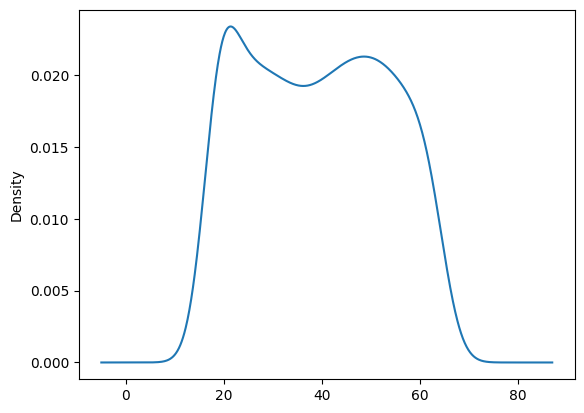

In [40]:
# Histogram
df['age'].plot(kind='density')

**Matplotlib plotting**

In [34]:
df['age'].value_counts().head(10)

age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
Name: count, dtype: int64

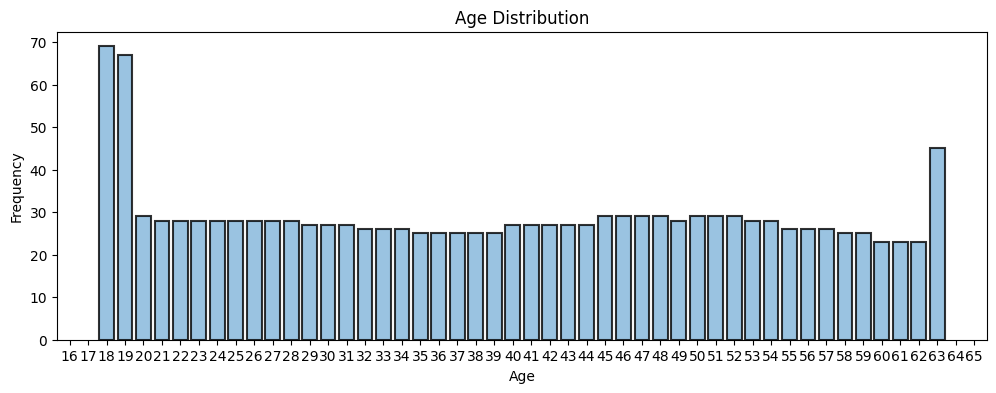

In [47]:
# Histogram
plt.figure(figsize=(12, 4))
plt.hist(df['age'], bins=46, color="#81b5da86", alpha=0.8, edgecolor='black', 
         rwidth=0.8, linewidth=1.5, align='left')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.xticks([i for i in range(16, 66)])

plt.show()

**Seaborn Plotting**

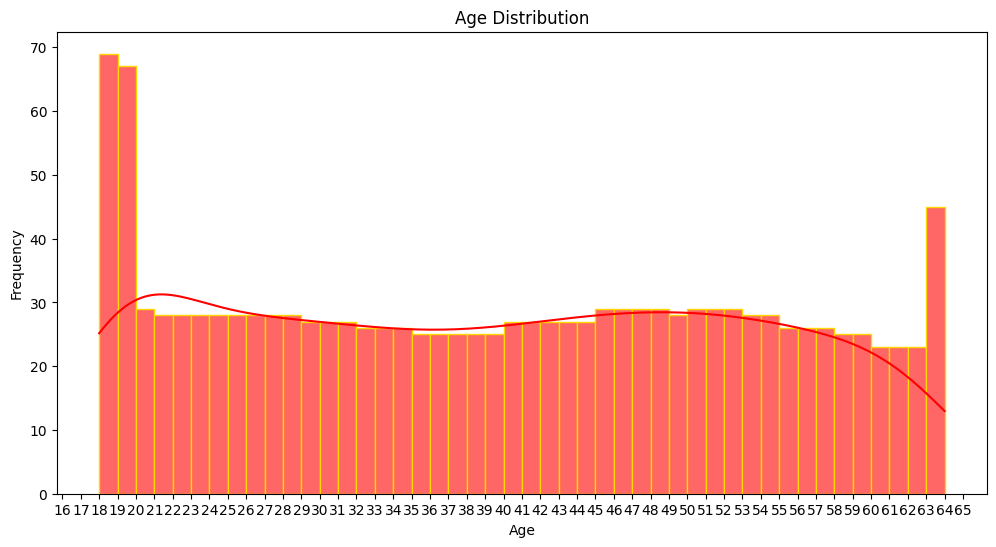

In [60]:
# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=46, color='r', alpha=0.6, edgecolor='gold', kde=True, fill=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.xticks([i for i in range(16, 66)])

plt.show()

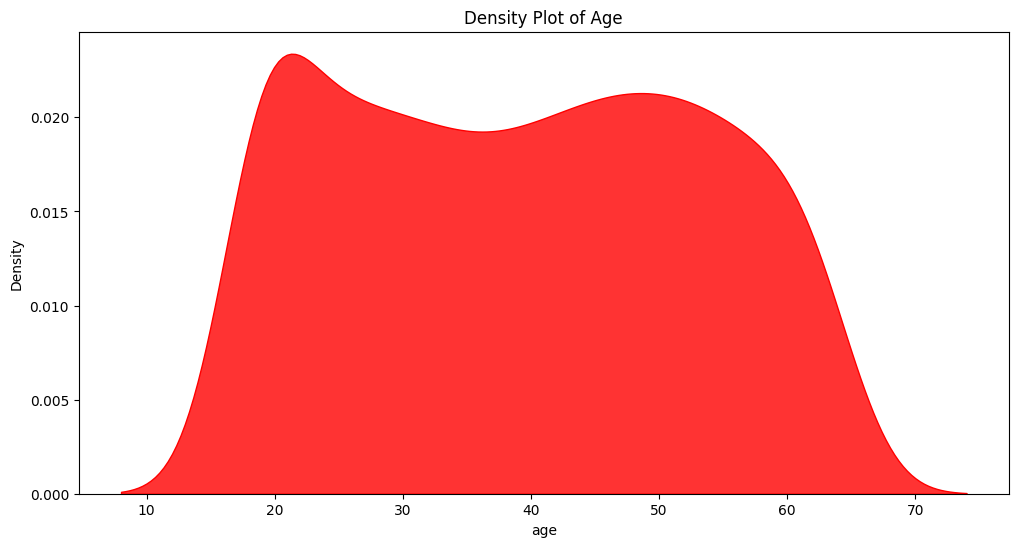

In [59]:
# Density Plot
plt.figure(figsize=(12, 6))

sns.kdeplot(df['age'], color='red', alpha=0.8, fill=True)
plt.title('Density Plot of Age')
plt.show()

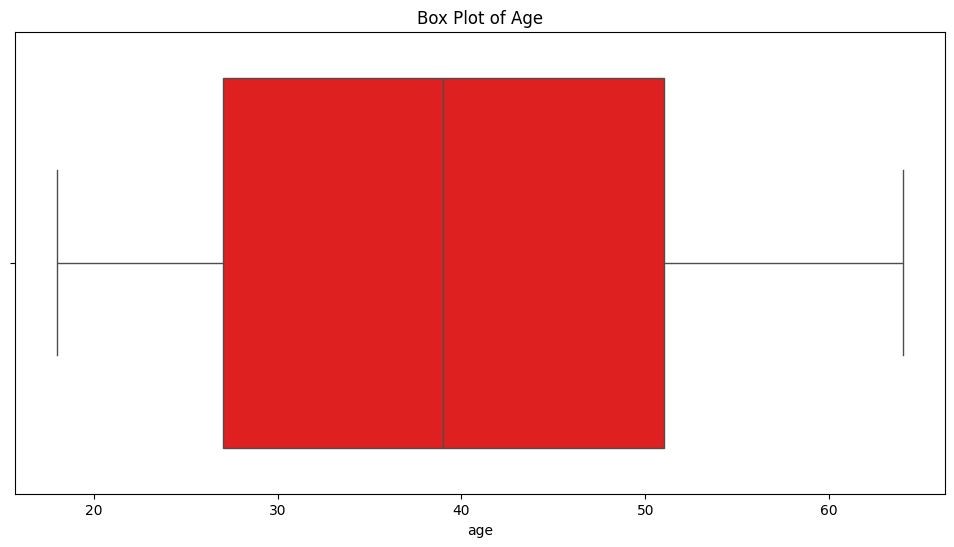

In [62]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(df['age'], color='red', orient='h')
plt.title('Box Plot of Age')
plt.show()

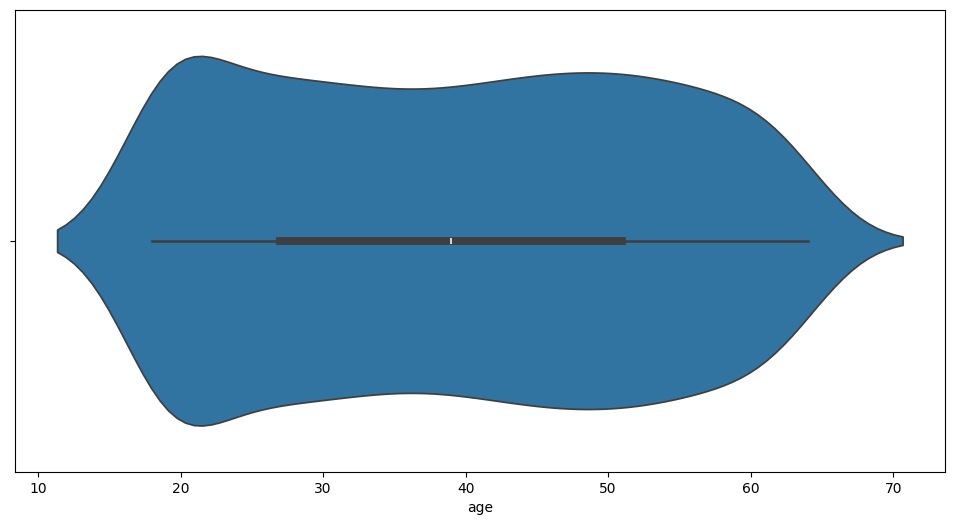

In [63]:
# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(df['age'], orient='h')
plt.show()

##### **Gender column**

In [65]:
df['gender'].value_counts()

gender
male      675
female    662
Name: count, dtype: int64

**Pandas Plotting**

<Axes: xlabel='gender'>

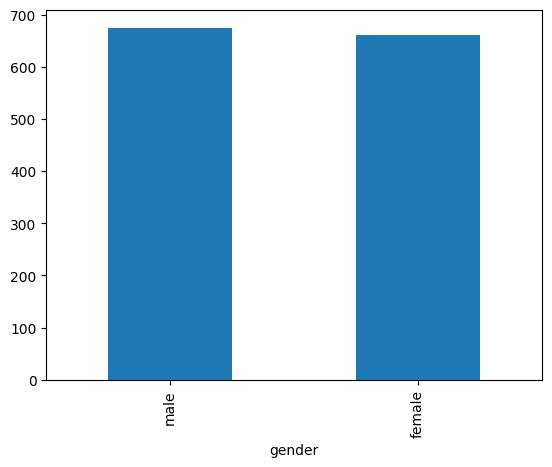

In [66]:
# Bar Plot
df['gender'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

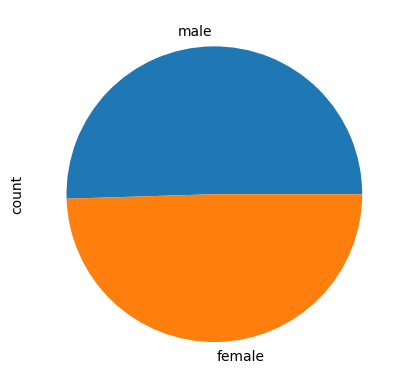

In [67]:
# Pie Plot
df['gender'].value_counts().plot(kind='pie')

**Matplotlib Plotting**

In [77]:
df['gender'].value_counts().values

array([675, 662], dtype=int64)

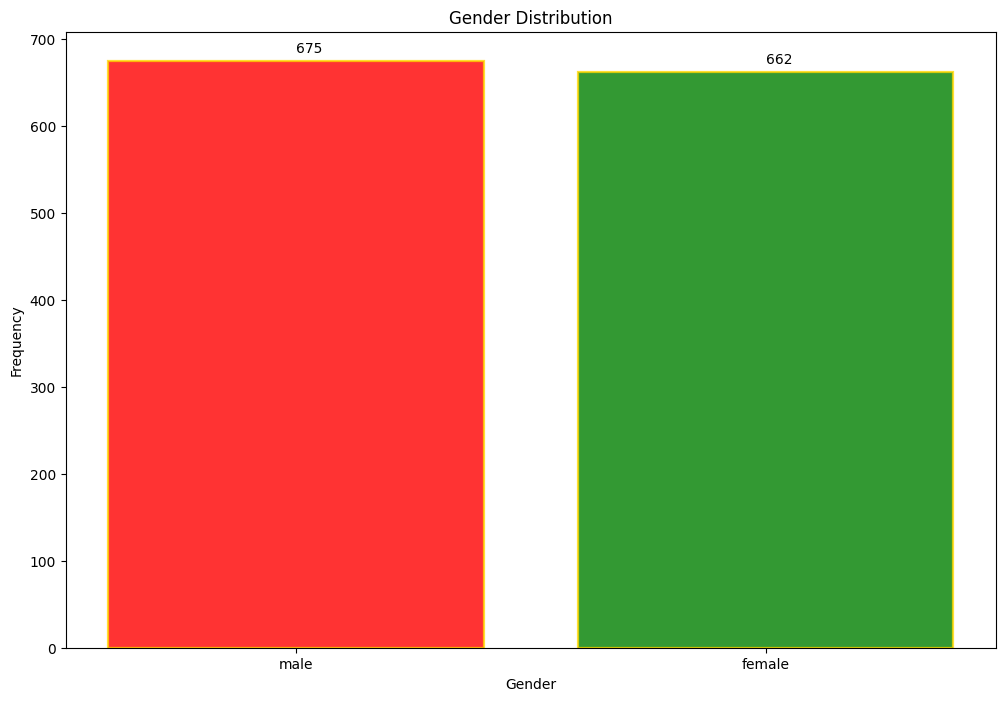

In [136]:
# Bar Plot
counts = df['gender'].value_counts().values
plt.figure(figsize=(12, 8))
plt.bar(df['gender'].value_counts().index, df['gender'].value_counts().values, color=['red', 'green'], alpha=0.8, edgecolor='gold', linewidth=1.6)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Distribution')

for i in range(2):
    plt.text(i, counts[i] + 10, counts[i])


plt.show()

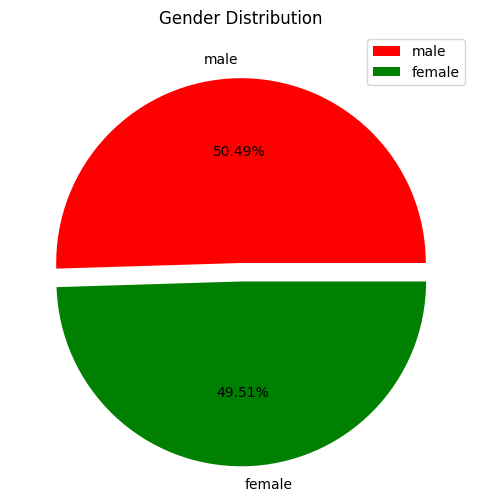

In [116]:
# Pie Plot
plt.figure(figsize=(6, 6))
plt.pie(df['gender'].value_counts(), explode=[0, 0.1], labels=df['gender'].value_counts().index, 
        colors=['red', 'green'], autopct='%1.2f%%')
plt.legend(loc='upper right')
plt.title('Gender Distribution')
plt.show()

**Seaborn Plotting**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25940\4282523618.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['gender'].value_counts().index, y=df['gender'].value_counts().values, palette=['red', 'green'])


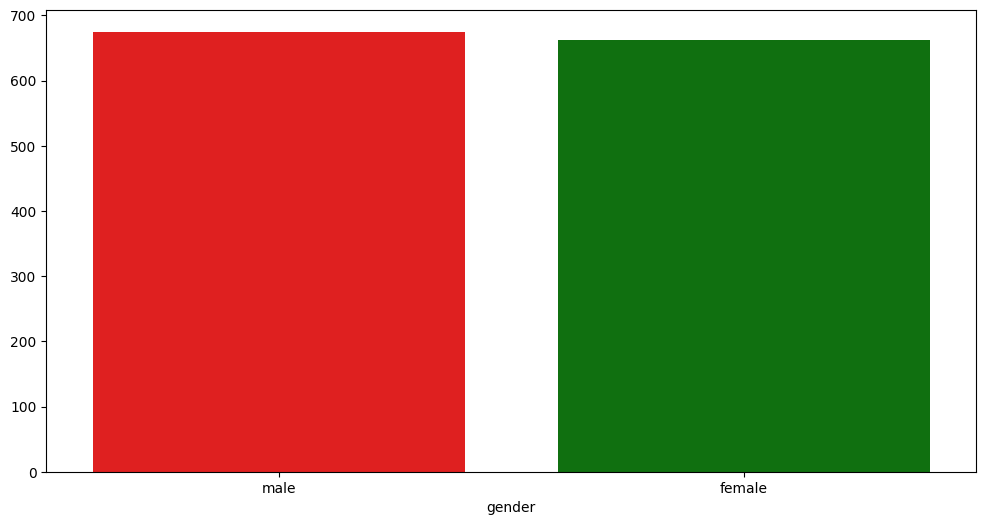

In [138]:
# Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=df['gender'].value_counts().index, y=df['gender'].value_counts().values, palette=['red', 'green'])
plt.show()

In [141]:
df['gender']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: gender, Length: 1337, dtype: object

In [145]:
df['gender']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: gender, Length: 1337, dtype: object

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25940\148503233.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette=sns.color_palette("Set2"), fill=False)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25940\148503233.py:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=df, x='gender', palette=sns.color_palette("Set2"), fill=False)


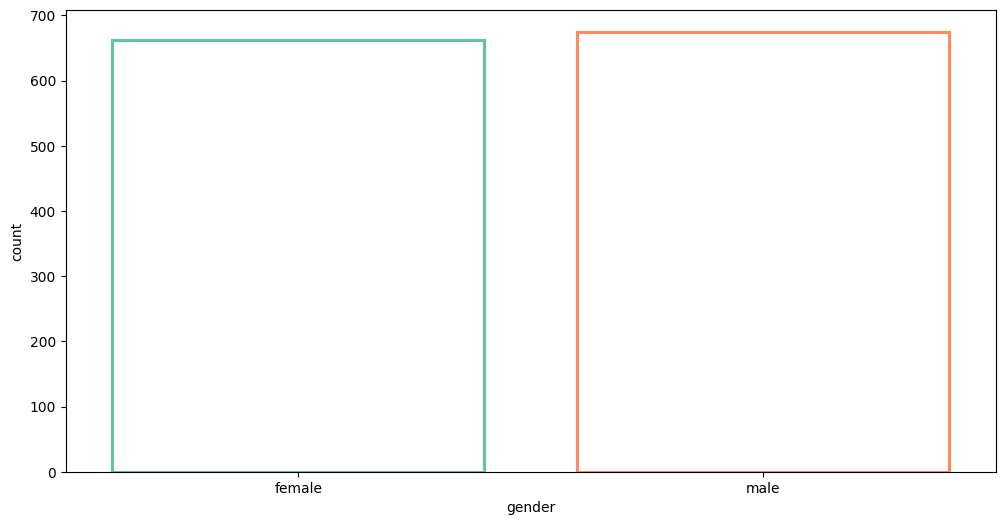

In [147]:
# Count Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='gender', palette=sns.color_palette("Set2"), fill=False)

plt.show()

- **Seaborn doesn't support PieChart**

**Numerical columns**

<Axes: ylabel='Frequency'>

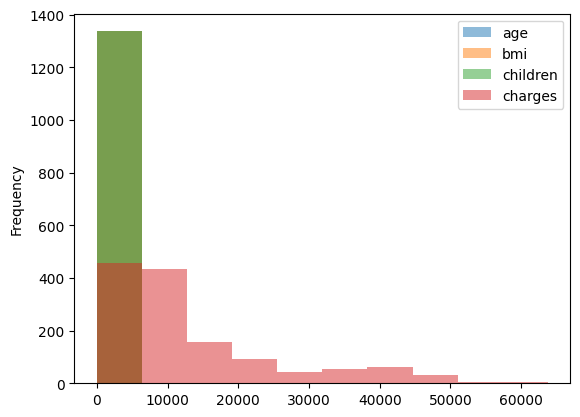

In [158]:
# Histograms for numerical columns 
df.plot(kind='hist', alpha=0.5)

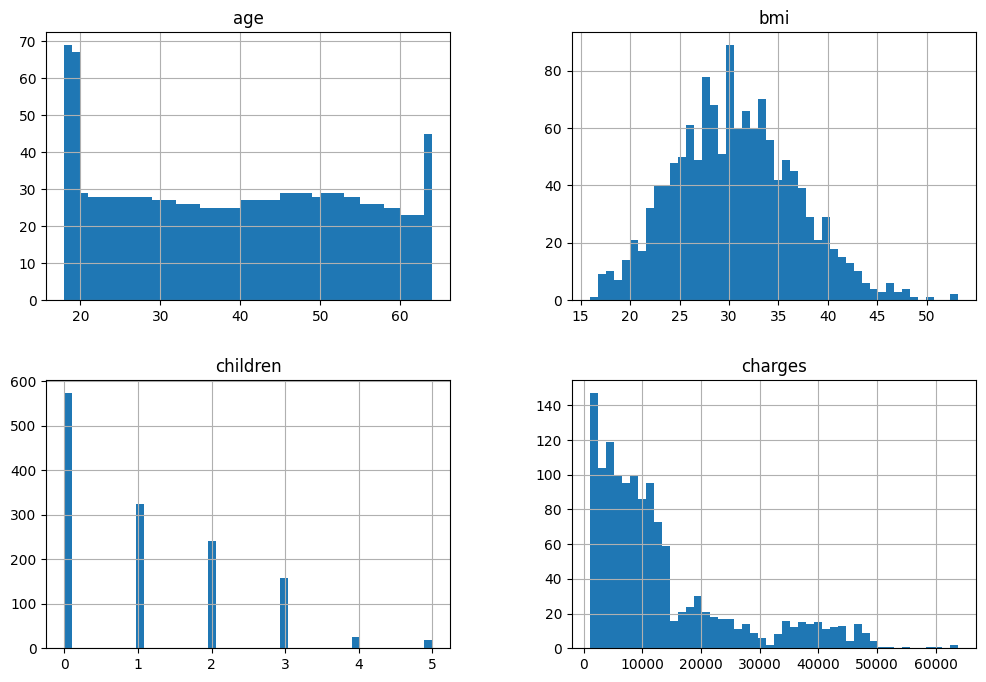

In [151]:
df.hist(bins=46, figsize=(12, 8))
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25940\4178783536.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette=['red', 'green'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25940\4178783536.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='smoker', palette=['red', 'blue'])


<function matplotlib.pyplot.show(close=None, block=None)>

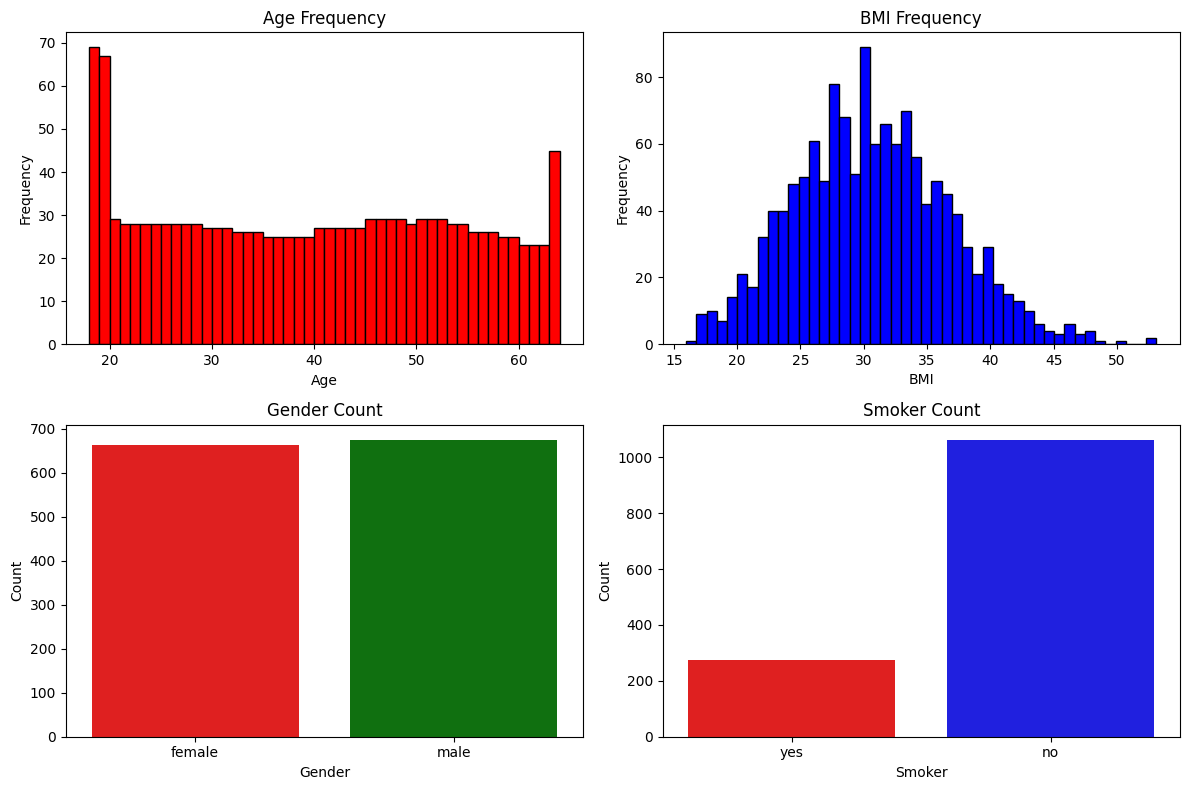

In [ ]:
# Histograms for numerical columns using subplot
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(df['age'], bins=46, edgecolor='black', color='red')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Frequency')

plt.subplot(2, 2, 2)
plt.hist(df['bmi'], bins=46, edgecolor='black', color='blue')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Frequency')

plt.subplot(2, 2, 3)
sns.countplot(data=df, x='gender', palette=['red', 'green'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Count')

plt.subplot(2, 2, 4)
sns.countplot(data=df, x='smoker', palette=['red', 'blue'])
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Smoker Count')

plt.tight_layout()
plt.show


**Categorical Columns**

In [ ]:
# Subplot

- There is another way to create subplot

In [ ]:
# Subplots

----------------------

#### **Bivariate Analysis**

In [159]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Scatter Plot**

In [ ]:
df[['age', 'charges']].corr()

,age,charges
age,1.000000,0.299008
charges,0.299008,1.000000


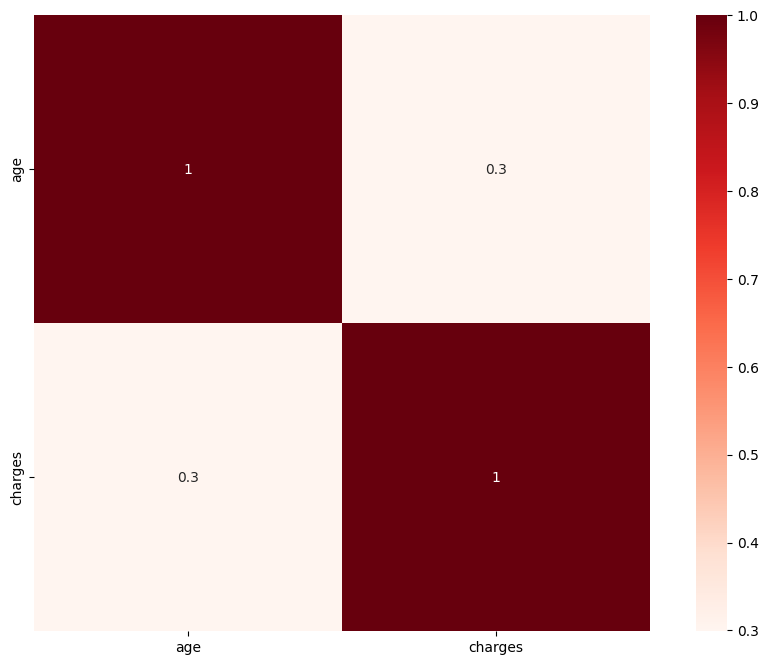

In [13]:
plt.figure(figsize=(12, 8))
cm = df[['age', 'charges']].corr()
sns.heatmap(cm, annot=True, cmap='Reds', square=True)
plt.show()

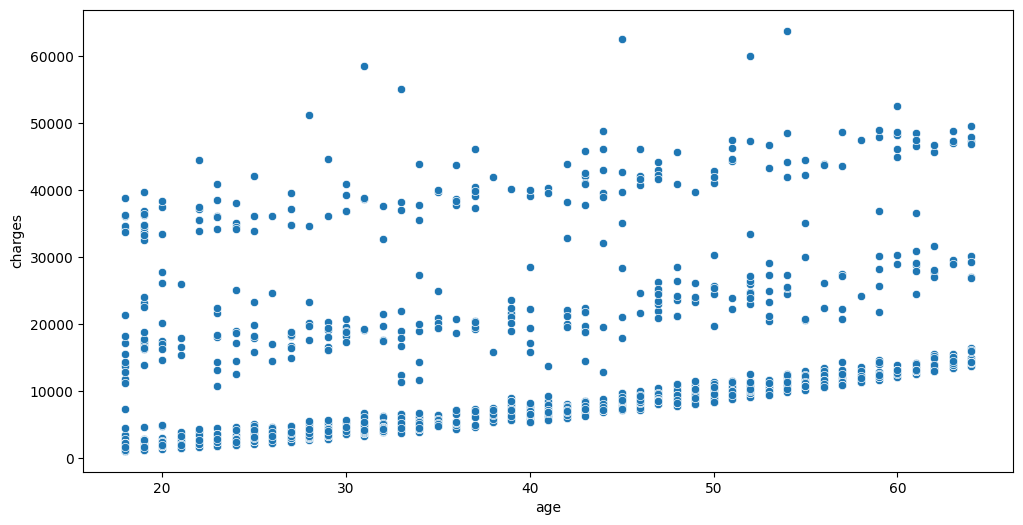

In [161]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='age', y='charges')

plt.show()

**PairPlot**

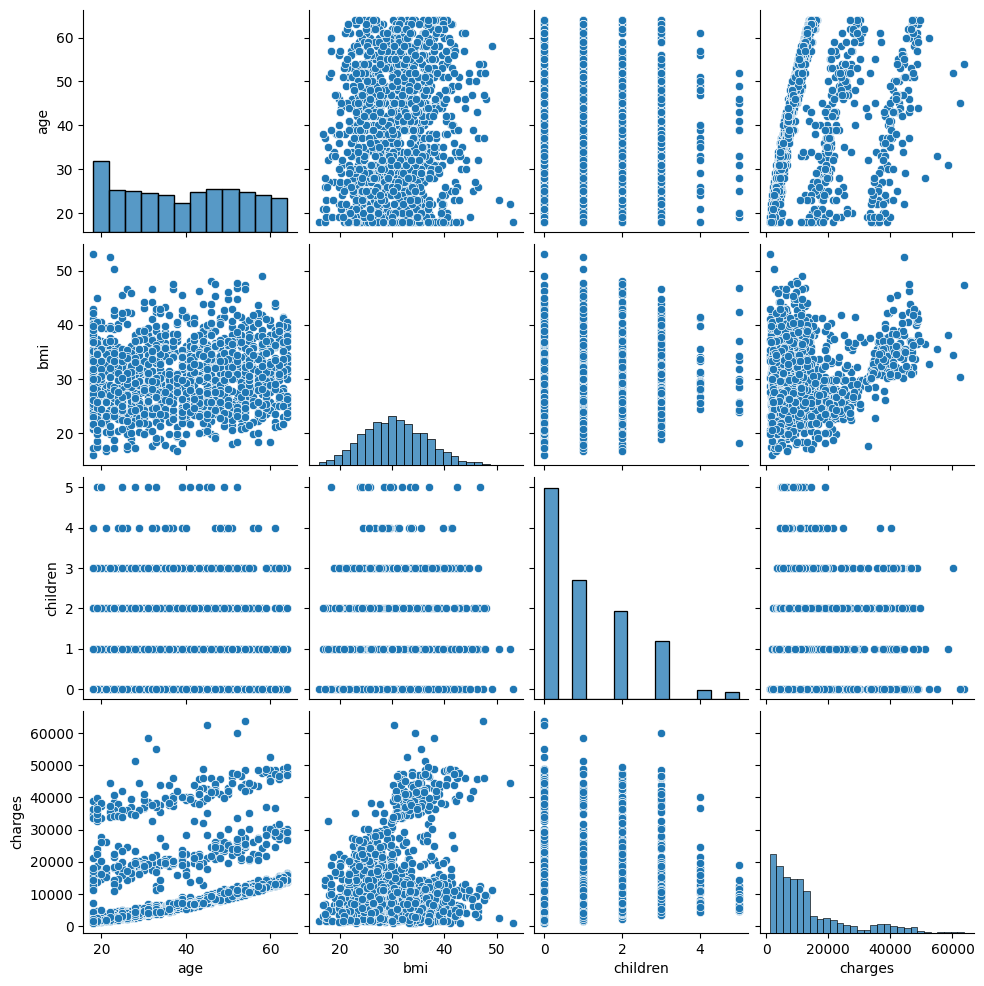

In [ ]:
sns.pairplot(data=df)
plt.show()

**JointPlot**
- `jointplot()` allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
    * “scatter” 
    * “reg” 
    * “resid” 
    * “kde” 
    * “hex”

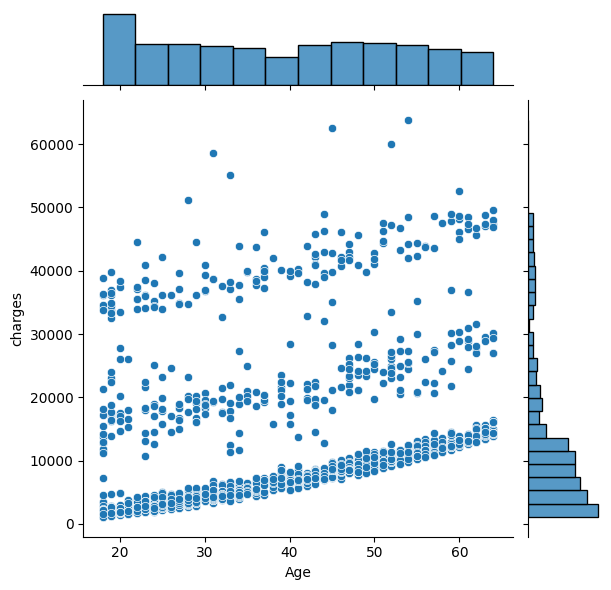

In [14]:
sns.jointplot(data=df, x='age', y='charges', kind='scatter')
plt.xlabel('Age')
plt.show()

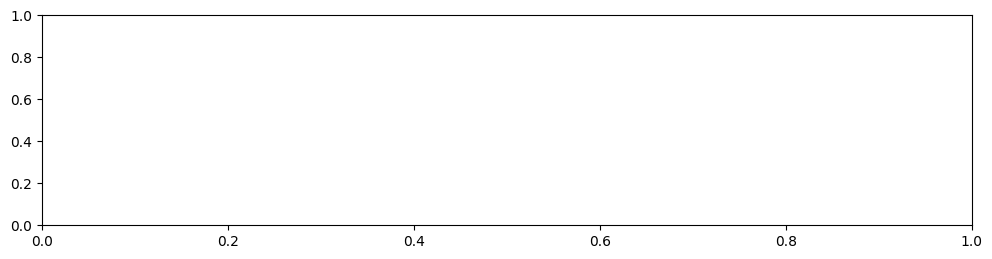

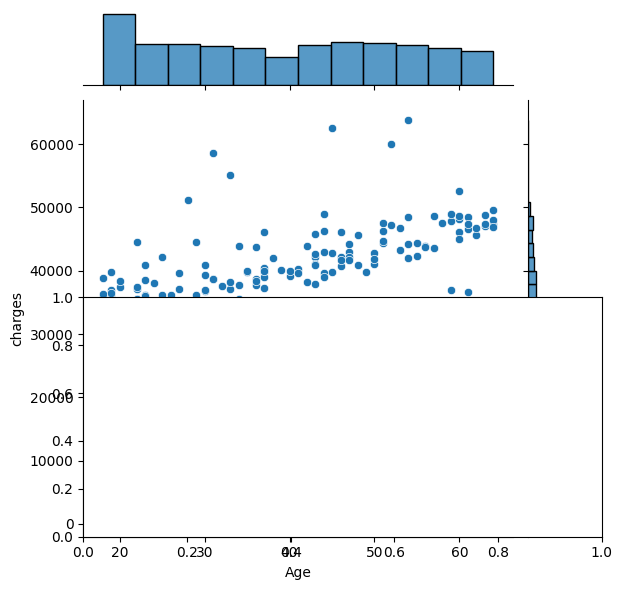

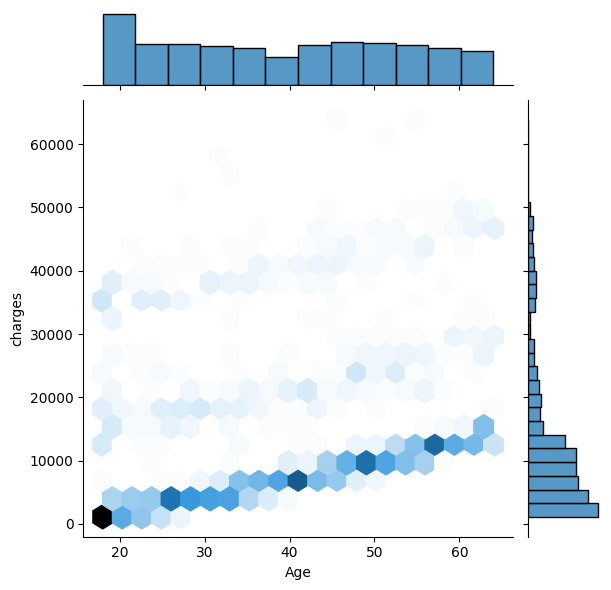

In [175]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.jointplot(data=df, x='age', y='charges', kind='scatter')
plt.xlabel('Age')

plt.subplot(2, 1, 2)
sns.jointplot(data=df, x='age', y='charges', kind='hex')
plt.xlabel('Age')

plt.show()

**BoxPlot**

In [15]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


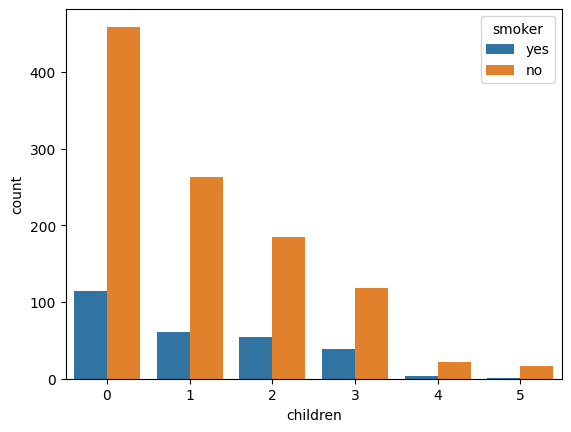

In [36]:
sns.countplot(data=df, x='children', hue='smoker')
plt.show()

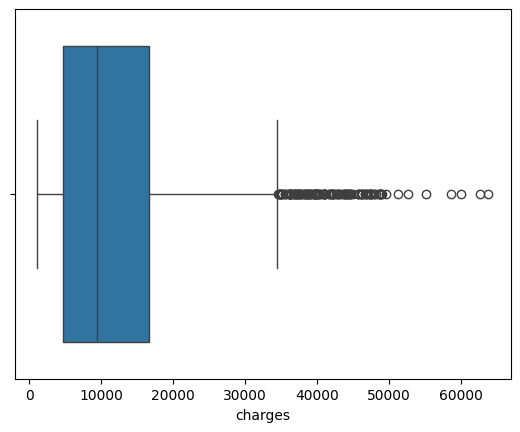

In [26]:
sns.boxplot(data=df, x='charges')
plt.show()

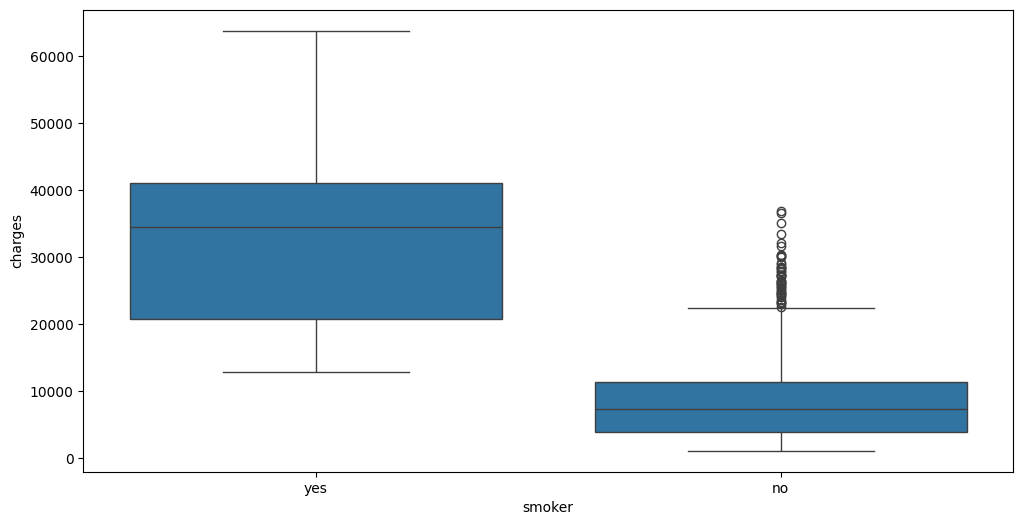

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='smoker', y='charges')
plt.show()

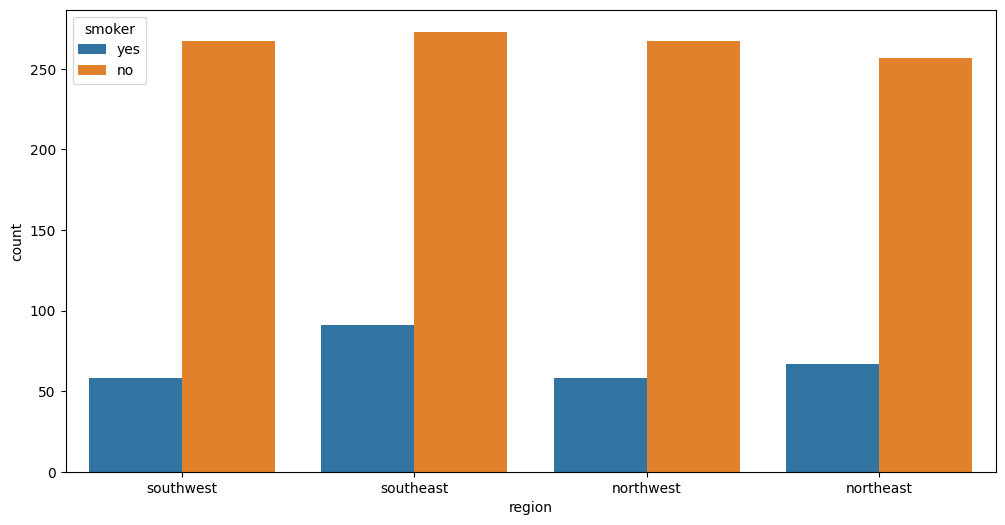

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='region', hue='smoker')
plt.show()

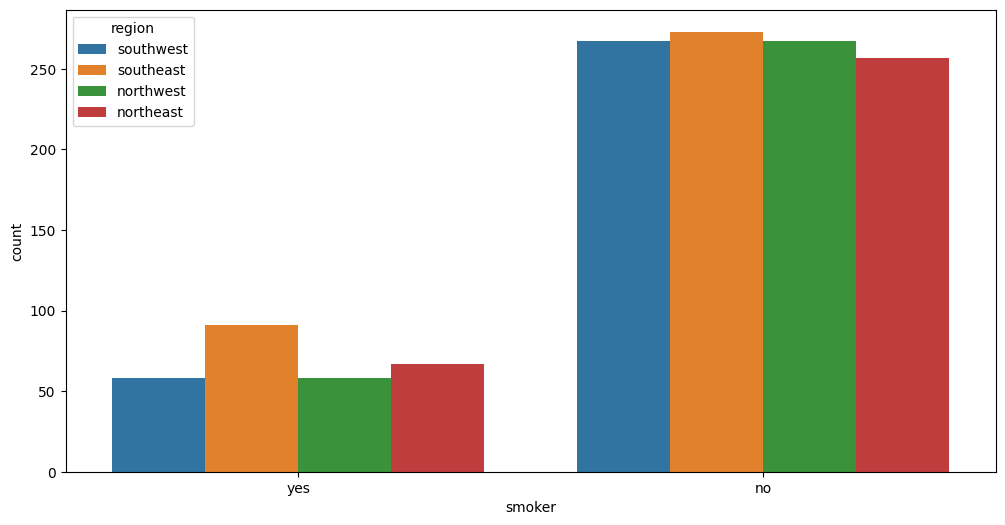

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='smoker', hue='region')
plt.show()

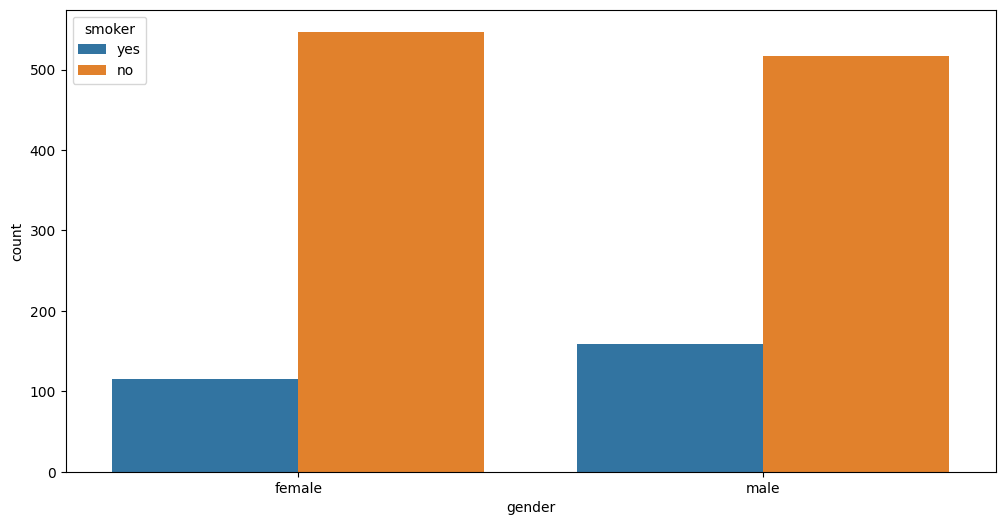

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='gender', hue='smoker')
plt.show()

In [35]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

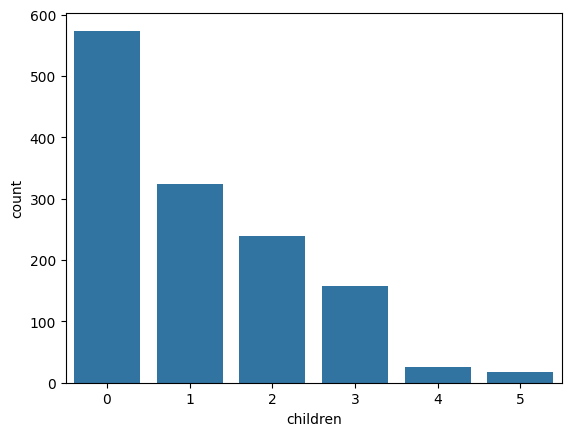

In [32]:
sns.countplot(data=df, x='children')
plt.show()

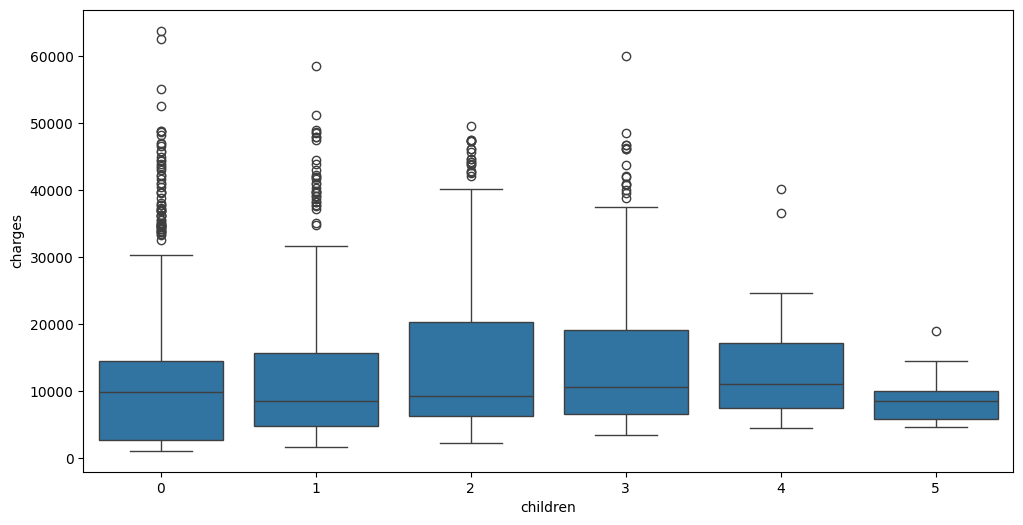

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='children', y='charges')
plt.show()

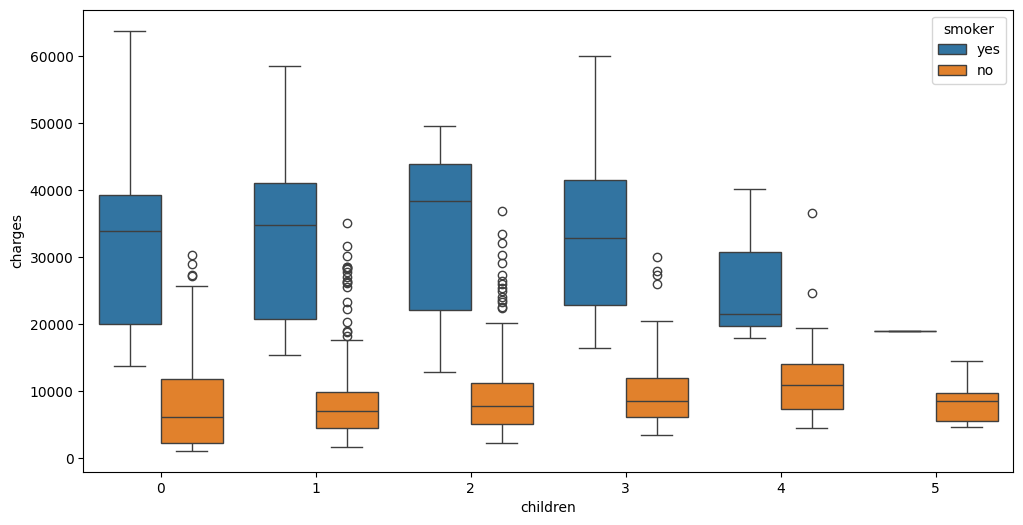

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='children', y='charges', hue='smoker')
plt.show()

---------------

**Multivariate Analysis**

**Scatter Plot**

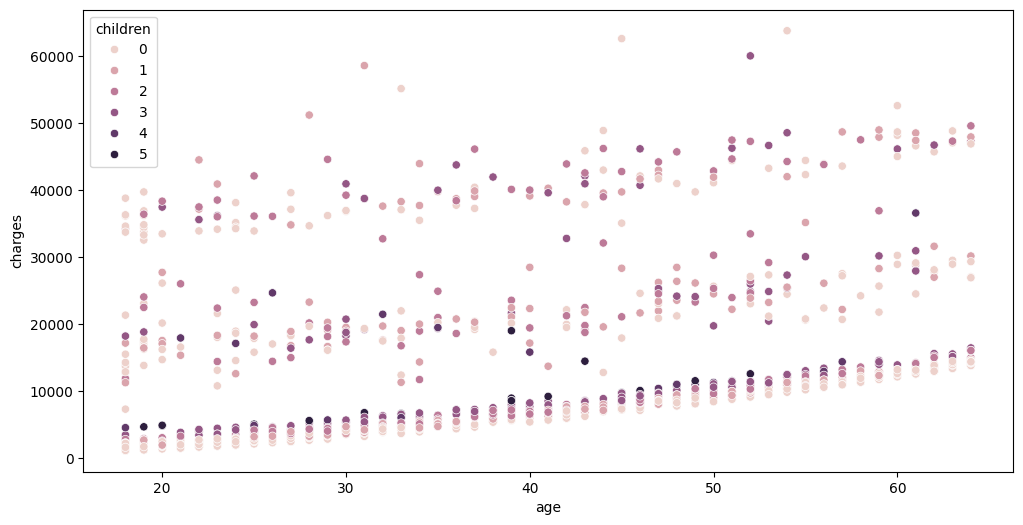

In [30]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='children')
plt.show()

**Pair Plot**

**Heatmap**

<Axes: >

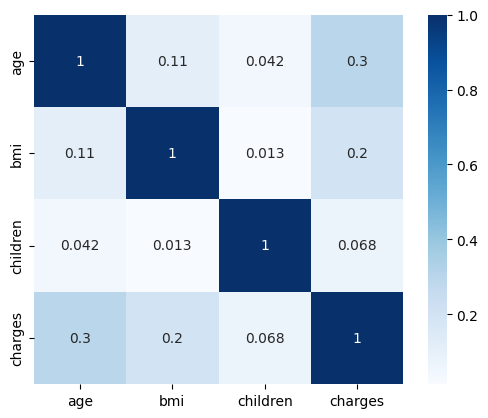

In [39]:
cm = df.corr(numeric_only=True)
sns.heatmap(cm, annot=True, cmap='Blues', square=True)

---------------